# Importing Library

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean, stdev
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score, auc,classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
%matplotlib inline

# Load Dataset

In [2]:
data = 'adult.csv'

df = pd.read_csv(data, header=None, sep=',\s')

C:\Users\User\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.describe()

,0,2,4,10,11,12
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       32561 non-null  int64 
 1   1       32561 non-null  object
 2   2       32561 non-null  int64 
 3   3       32561 non-null  object
 4   4       32561 non-null  int64 
 5   5       32561 non-null  object
 6   6       32561 non-null  object
 7   7       32561 non-null  object
 8   8       32561 non-null  object
 9   9       32561 non-null  object
 10  10      32561 non-null  int64 
 11  11      32561 non-null  int64 
 12  12      32561 non-null  int64 
 13  13      32561 non-null  object
 14  14      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64

# Preprocessing

In [8]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names

df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [9]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [10]:
df['income'] = df['income'].replace(['<=50K', '>50K'], [0,1])

In [11]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 8 categorical variables

The categorical variables are :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']


In [12]:
# view frequency distribution of categorical variables

for var in categorical: 
    
    print(df[var].value_counts()/np.float(len(df)))

Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
?                   0.056386
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: workclass, dtype: float64
HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013298
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: education, dtype: float64
Married-civ-spouse       0.459937
Never-married            0.328092
Divorced                 0.136452
Separated                0.031479
Widowed                  0.030497
Married-spouse-absent    0.012837
Married-AF-spouse        0.000706
Name: marital_status, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_10676\1569377904.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(df[var].value_counts()/np.float(len(df)))


In [13]:
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [14]:
df['workclass'].replace('?', np.NaN, inplace=True)
df['occupation'].replace('?', np.NaN, inplace=True)
df['native_country'].replace('?', np.NaN, inplace=True)

In [15]:
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [16]:
for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' unique values')

workclass  contains  9  unique values
education  contains  16  unique values
marital_status  contains  7  unique values
occupation  contains  15  unique values
relationship  contains  6  unique values
race  contains  5  unique values
sex  contains  2  unique values
native_country  contains  42  unique values


In [17]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 7 numerical variables

The numerical variables are : ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'income']


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [19]:
X = df.drop(['income'], axis=1)

y = df['income']

In [20]:
X = pd.get_dummies(X)

In [21]:
y.value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [22]:
#imbalanced dataset

# Split dataset

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [24]:
X_train.shape, X_test.shape

((24420, 105), (8141, 105))

In [25]:
X_train.isnull().sum()

age                               0
fnlwgt                            0
education_num                     0
capital_gain                      0
capital_loss                      0
                                 ..
native_country_Thailand           0
native_country_Trinadad&Tobago    0
native_country_United-States      0
native_country_Vietnam            0
native_country_Yugoslavia         0
Length: 105, dtype: int64

In [26]:
X_test.isnull().sum()

age                               0
fnlwgt                            0
education_num                     0
capital_gain                      0
capital_loss                      0
                                 ..
native_country_Thailand           0
native_country_Trinadad&Tobago    0
native_country_United-States      0
native_country_Vietnam            0
native_country_Yugoslavia         0
Length: 105, dtype: int64

In [27]:
cols = X_train.columns

In [28]:
scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [29]:
X_train = pd.DataFrame(X_train, columns=[cols])

X_test = pd.DataFrame(X_test, columns=[cols])

In [30]:
X_train.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,0.60,0.127233,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.50,-0.368699,-0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.35,-0.068631,-1.000000,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.10,4.002207,1.000000,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.85,0.083430,1.000000,0.0,1408.0,-0.4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Training/Relationship

In [31]:
# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [32]:
y_pred = gnb.predict(X_test)

y_pred

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [33]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8069


In [34]:
y_pred_train = gnb.predict(X_train)

y_pred_train

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [35]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7999


In [36]:
print('Training-set auc score: {0:0.4f}'. format(roc_auc_score(y_train, y_pred_train)))

Training-set auc score: 0.8061


# Model Evaluation

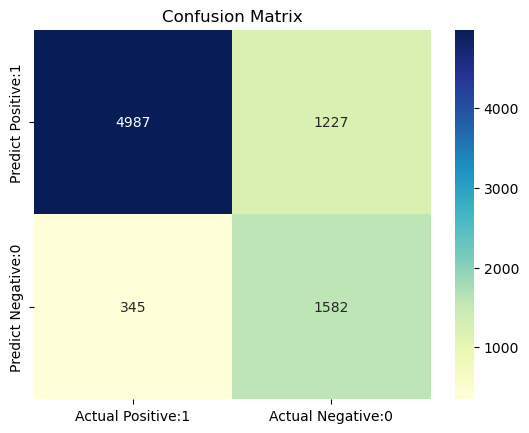

In [37]:
cm = confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix');

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.80      0.86      6214
           1       0.56      0.82      0.67      1927

    accuracy                           0.81      8141
   macro avg       0.75      0.81      0.77      8141
weighted avg       0.85      0.81      0.82      8141



In [39]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [40]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8069


In [41]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1931


In [42]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.8025


In [43]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9353


In [44]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9353


In [45]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.4368


In [46]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.5632


In [47]:
f1_score(y_test, y_pred)

0.6680743243243242

In [48]:
y_pred_prob = gnb.predict_proba(X_test)[0:10]

y_pred_prob

array([[9.99997891e-01, 2.10895526e-06],
       [1.58136604e-01, 8.41863396e-01],
       [3.18207570e-02, 9.68179243e-01],
       [9.99991532e-01, 8.46764618e-06],
       [9.89640091e-01, 1.03599085e-02],
       [1.16057295e-04, 9.99883943e-01],
       [4.36987851e-56, 1.00000000e+00],
       [9.99999983e-01, 1.71557906e-08],
       [9.99804114e-01, 1.95886028e-04],
       [2.92626036e-03, 9.97073740e-01]])

In [49]:
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - <=50K', 'Prob of - >50K'])

y_pred_prob_df

,Prob of - <=50K,Prob of - >50K
0,9.999979e-01,2.108955e-06
1,1.581366e-01,8.418634e-01
2,3.182076e-02,9.681792e-01
3,9.999915e-01,8.467646e-06
4,9.896401e-01,1.035991e-02
5,1.160573e-04,9.998839e-01
6,4.369879e-56,1.000000e+00
7,1.000000e+00,1.715579e-08
8,9.998041e-01,1.958860e-04
9,2.926260e-03,9.970737e-01


In [50]:
y_pred1 = gnb.predict_proba(X_test)[:, 1]

In [51]:
roc_auc_score(y_test, y_pred)

0.8117539382838925

In [52]:
f1_score(y_test, y_pred)

0.6680743243243242

In [53]:
ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9001


# Using Cross Validation

In [54]:
Cross_validated_ROC_AUC = cross_val_score(gnb, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8938


In [55]:
Cross_validated_ROC_AUC = cross_val_score(gnb, X_test, y_test, cv=10, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8952


In [56]:
Cross_validated_ROC_AUC = cross_val_score(gnb, X_test, y_test, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8949


In [57]:
X

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32557,40,154374,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32558,58,151910,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32559,22,201490,9,0,0,20,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [58]:
X.shape

(32561, 105)

In [59]:
y.shape

(32561,)

In [60]:
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score),
            }

#kfold = model_selection.KFold(n_splits=10)
model = gnb

results = model_selection.cross_validate(estimator=model,
                                          X=X,
                                          y=y,
                                          cv=10,
                                          scoring=scoring)

for i, v in results.items():
    print(i, v.mean())

fit_time 0.16805930137634278
score_time 0.03559587001800537
test_accuracy 0.795276635317317
test_precision 0.6586295521196748
test_recall 0.3108021903028727
test_f1_score 0.42220268666587757


In [61]:
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score),
            }

#kfold = model_selection.KFold(n_splits=10)
model = gnb

results = model_selection.cross_validate(estimator=model,
                                          X=X,
                                          y=y,
                                          cv=5,
                                          scoring=scoring)

for i, v in results.items():
    print(i, v.mean())

fit_time 0.15596556663513184
score_time 0.054656696319580075
test_accuracy 0.7951537437315881
test_precision 0.6583734357551856
test_recall 0.31067445142492944
test_f1_score 0.4221117207298434


# Stratified K Fold

In [62]:
# acc
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []
lst_precision_stratified = []
lst_recall_stratified = []
lst_f1_score_stratified = []
lst_auc_stratified = []
  
X_strfdkfold =  np.array(X)
y_strfdkfold = np.array(y)  

for train_index, test_index in skf.split(X_strfdkfold, y_strfdkfold):
    x_train_fold, x_test_fold = X_strfdkfold[train_index], X_strfdkfold[test_index]
    y_train_fold, y_test_fold = y_strfdkfold[train_index], y_strfdkfold[test_index]
    gnb.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(gnb.score(x_test_fold, y_test_fold))
    lst_precision_stratified.append(precision_score(y_test_fold, gnb.predict(x_test_fold)))
    lst_recall_stratified.append(recall_score(y_test_fold, gnb.predict(x_test_fold)))
    lst_f1_score_stratified.append(f1_score(y_test_fold, gnb.predict(x_test_fold)))
    lst_auc_stratified.append(roc_auc_score(y_test_fold, gnb.predict_proba(x_test_fold)[:,1]))
    
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

List of possible accuracy: [0.79060485108996, 0.7963759213759214, 0.7837837837837838, 0.800982800982801, 0.8123464373464373, 0.7963759213759214, 0.788083538083538, 0.7899262899262899, 0.7985257985257985, 0.7942260442260443]

Maximum Accuracy That can be obtained from this model is: 81.23464373464373 %

Minimum Accuracy: 78.37837837837837 %

Overall Accuracy: 79.51231386716495 %

Standard Deviation is: 0.007972581949290633


In [63]:
print('acc stratified: ', mean(lst_accu_stratified))
print('precision stratified: ', mean(lst_precision_stratified))
print('recall stratified: ', mean(lst_recall_stratified))
print('f1 score stratified: ', mean(lst_f1_score_stratified))
print('auc score stratified: ', mean(lst_auc_stratified))

acc stratified:  0.7951231386716495
precision stratified:  0.6578727574429978
recall stratified:  0.31067626413622773
f1 score stratified:  0.4219739020862885
auc score stratified:  0.8326623928937416
